<a href="https://colab.research.google.com/github/Redwoods/Py/blob/master/py-ml-dl-tf/Keras/Keras_mnist_analysis_3_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras example: mnist analysis by DL (CV2D)

- Keras was designed to easily use the famous deep-learning frameworks; tensorflow, tenano. 
- Keras provides an easy and convenient way to build deep learning models.

    - Keras is an open source python library that enables you to easily build Deep Neural Networks. 
    - The library is capable of running on top of TensorFlow, Theano, Microsoft Cognitive Toolkit, and MXNet. 
    - Tensorflow and Theano are the most used numerical platforms in Python to build Deep Learning algorithms but they can be quite complex and difficult to use.
    
[Goood Intro to Keras](https://towardsdatascience.com/how-to-build-a-neural-network-with-keras-e8faa33d0ae4)

In [0]:
# import numpy as np
# from keras.utils import to_categorical
# from keras import models
# from keras import layers

In [0]:
%%time
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

Using TensorFlow backend.


CPU times: user 1.2 s, sys: 166 ms, total: 1.37 s
Wall time: 1.37 s


In [0]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [0]:
X_train0[0]  # 0 =< value =< 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
y_train0[0]

5

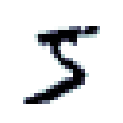

In [0]:
# Plot X_train0[0]
plt.figure(figsize=(2, 2))
plt.imshow(X_train0[0], cmap=mpl.cm.bone_r)  # colormap
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

### Show images of numbers

In [0]:
# 추가 사항
import numpy as np
# import matplotlib as mpl
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

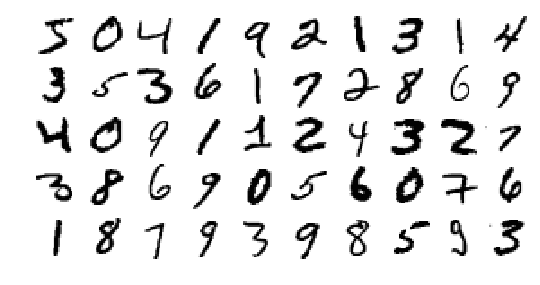

In [0]:
plt.figure(figsize=(9,9))
example_images = np.r_[X_train0[:50]]
plot_digits(example_images, images_per_row=10)

plt.show()

### 데이터를 float 타입으로 바꾸고 스케일링한다. (GPU powered!)

In [0]:
X_train = X_train0.reshape(60000, 28, 28, 1).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 28, 28, 1).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

# 데이터의 구조가 simple NN과는 다름을 확인하시오. (784 -> (28,28))

(60000, 28, 28, 1) float32


### y 데이터는 One-Hot-Encoding 을 한다. (Probabilistic labeling)

In [0]:
y_train0[:5]  # first 5 labels

array([5, 0, 4, 1, 9], dtype=uint8)

In [0]:
# to_categorical()
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)
y_train[:5]  # Probabilistic labeling

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

***

## 신경망 구현 순서

### Keras 를 사용하면 다음과 같은 순서로 신경망을 구성할 수 있다.

1. **모형 객체 생성**, Sequential 모형 클래스 객체 생성
2. **신경망 구성**, add 메서드로 layer 추가하여 구성
    - Dense layer 가 가장 일반적인 신경망
    - 입력단부터 순차적으로 추가한다.
    - 레이어는 출력 뉴런 갯수를 첫번째 인수로 받는다.
    - 최초의 레이어는 input_dim 인수로 입력 크기를 설정해야 한다.
    - activation 인수로 activation 함수 설정
3. **compile** 메서드로 모형 완성.
    - loss인수로 Loss 함수 설정
    - optimizer 인수로 최적화 알고리즘 설정
    - metrics 인수로 트레이닝 단계에서 기록할 성능 기준 설정
4. **fit** 메서드로 트레이닝
    - nb_epoch 로 epoch 횟수 설정
    - batch_size 로 mini batch size 설정
    - metrics 인수로 설정한 성능 기준 기록을 출력으로 반환
    - Jupyter Notebook을 사용할 때는 verbose=1 ->  show progress bar , verbose=2 ->  No progress bar 

### 모형 구조 출력 준비
> 만들어진 모형은 model_to_dot 명령이나 summary 명령으로 모델 내부의 layers 리스트를 살펴봄으로써 내부 구조를 확인할 수 있다.
- graphviz, pydot

In [0]:
# # Method-1 (Failed)
# # Install graphviz and pydot
# # https://pypi.python.org/pypi/pydot
# !apt-get -qq install -y graphviz && pip install -q pydot
# import pydot

In [0]:
# # Method-2 (Failed)
# !pip install pydot
# !pip install pydotplus
# !pip install GraphViz
# import pydot

In [0]:
# https://laujohn.com/2018/09/24/Plot-Keras-Model-in-Colaboratory/
# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

# Restart runtime to allow Jupyter to know the changes above (If necessary, run the below code)
import os
os._exit(0)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Double check with Python 3


In [0]:
# import graphviz
import pydot

### 모형 구성

In [0]:
from keras.optimizers import SGD  # Stochastic Gradient Decent
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

Using TensorFlow backend.


In [0]:
# Deep Learning model
np.random.seed(0)

# Simple NN
# model = Sequential()
# model.add(Dense(15, input_dim=784, activation="sigmoid"))  # firsr layer
# model.add(Dense(10, activation="sigmoid")) # output layer
# model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

# 컨볼루션 신경망의 설정 (Convolutional neural network 2D)
model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), input_dim=784, activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) # 1st layer with input
model.add(Conv2D(64, (3, 3), activation='relu')) # 2nd layer
model.add(MaxPooling2D(pool_size=2))  # Poolin layer
model.add(Dropout(0.25))  # Set dropout
model.add(Flatten())      # Flatten
model.add(Dense(128,  activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))   # Set dropout
model.add(Dense(10, activation='softmax')) # Output layer with softmax activation

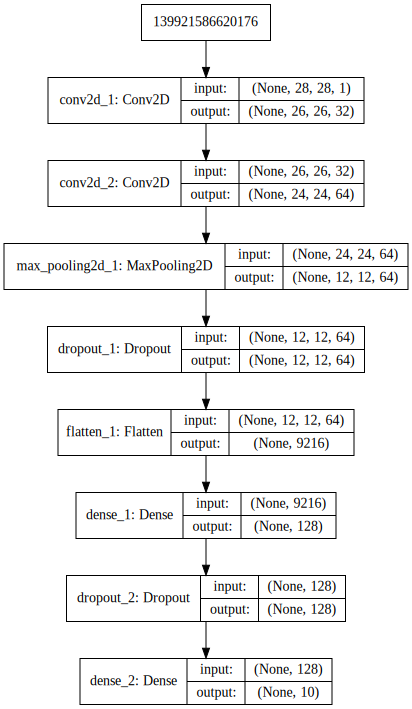

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model_DL.png')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [0]:
l1 = model.layers[0]  # 1st layer with input : Cpnv2D (filtering #1)
l2 = model.layers[1]  # 2nd layer : Conv2D (filtering #2)
l3 = model.layers[2]  # 3rd layer : max pooling (Extracting the dominant characteristics)
l4 = model.layers[3]  # 4th layer: dropout to avoid overfitting
l5 = model.layers[4]  # 5th layer: flatten
l6 = model.layers[5]  # 6th dense layer
l7 = model.layers[6]  # 7th layer: dropout to avoid overfitting
l8 = model.layers[7]  # last layer: output layer (softmax: probabilistic prediction of 0 to 9)

In [0]:
l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()  # 3*3*32 + 32 = 320

('conv2d_1',
 keras.layers.convolutional.Conv2D,
 (None, 26, 26, 32),
 'relu',
 320)

[link: moving gif - "How to do with convolution?"](http://machinelearninguru.com/_images/topics/computer_vision/basics/convolutional_layer_1/stride1.gif)

In [0]:
l2.name, type(l2), l2.output_shape, l2.activation.__name__, l2.count_params()   # 3*3*32*64 + 64 = 18496

('conv2d_2',
 keras.layers.convolutional.Conv2D,
 (None, 24, 24, 64),
 'relu',
 18496)

In [0]:
l3.name, type(l3), l3.output_shape, l3.count_params()

('max_pooling2d_1', keras.layers.pooling.MaxPooling2D, (None, 12, 12, 64), 0)

In [0]:
l4.name, type(l4), l4.output_shape, l4.count_params()

('dropout_1', keras.layers.core.Dropout, (None, 12, 12, 64), 0)

In [0]:
l5.name, type(l5), l5.output_shape, l5.count_params()  # 12*12*64 = 9216

('flatten_1', keras.layers.core.Flatten, (None, 9216), 0)

In [0]:
l6.name, type(l6), l6.output_shape, l6.activation.__name__, l6.count_params()   # 9216*128+128 = 1179776

('dense_1', keras.layers.core.Dense, (None, 128), 'relu', 1179776)

In [0]:
l7.name, type(l7), l7.output_shape, l7.count_params()

('dropout_2', keras.layers.core.Dropout, (None, 128), 0)

In [0]:
l8.name, type(l8), l8.output_shape, l8.activation.__name__, l8.count_params()  # 128*10 + 10 = 1290

('dense_2', keras.layers.core.Dense, (None, 10), 'softmax', 1290)

### Links to gooood introduction: convolution

- [cnn 요약, 직관적인 설명(단, bias에 대한 설명 부족)](http://taewan.kim/post/cnn/)
- [Undrestanding Convolutional Layers in Convolutional Neural Networks (CNNs)](http://machinelearninguru.com/computer_vision/basics/convolution/convolution_layer.html)
- [Short Introduction to Convolutions and Pooling](https://medium.com/analytics-vidhya/deep-learning-methods-1700548a3093)

## fit 메서드로 트레이닝

In [0]:
# Compiling model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# adam: Adaptive Moment Estimation

### Reload data and preprocess data

In [0]:
%%time
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

CPU times: user 320 ms, sys: 12.1 ms, total: 332 ms
Wall time: 337 ms


In [0]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


In [0]:
# 데이터를 float 타입으로 바꾸고 스케일링한다. 
X_train = X_train0.reshape(60000, 28, 28, 1).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 28, 28, 1).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 28, 28, 1) float32


In [0]:
# One-hot encoding: Probabilistic labeling
# to_categorical()
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

In [0]:
# Fitting model
%%time
hist = model.fit(X_train, y_train, 
                 epochs=30, batch_size=100, 
                 validation_data=(X_test, y_test), 
                 verbose=1)

# batch_size: 100 -> 60,000개의 트레이닝 데이터를 100개씩 600묶음으로 나눈 후, 
# 각 묶음에 대하어 forward, back propagation을 실시하면서 파라미터를 조정한다.
# epochs: 전체 600개의 batch에 대하여 다 계산을 수행하면 epoch 1 종료.
# validation_data: 테스트 데이터를 섞어서 검증한다.

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 15s 248us/step - loss: 0.2298 - acc: 0.9301 - val_loss: 0.0497 - val_acc: 0.9842
Epoch 2/30
60000/60000 [==============================] - 10s 173us/step - loss: 0.0840 - acc: 0.9747 - val_loss: 0.0370 - val_acc: 0.9879
Epoch 3/30
60000/60000 [==============================] - 10s 174us/step - loss: 0.0625 - acc: 0.9809 - val_loss: 0.0338 - val_acc: 0.9886
Epoch 4/30
60000/60000 [==============================] - 10s 175us/step - loss: 0.0506 - acc: 0.9845 - val_loss: 0.0301 - val_acc: 0.9905
Epoch 5/30
60000/60000 [==============================] - 10s 174us/step - loss: 0.0435 - acc: 0.9865 - val_loss: 0.0338 - val_acc: 0.9893
Epoch 6/30
60000/60000 [==============================] - 11s 175us/step - loss: 0.0374 - acc: 0.9883 - val_loss: 0.0294 - val_acc: 0.9912
Epoch 7/30
60000/60000 [==============================] - 10s 175us/step - loss: 0.0351 - acc: 0.9883 - val_loss: 0.

### Plot results: preformance and accuracy

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

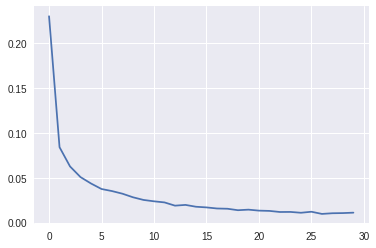

In [0]:
# Plot performance
plt.plot(hist.history['loss'])
plt.show()

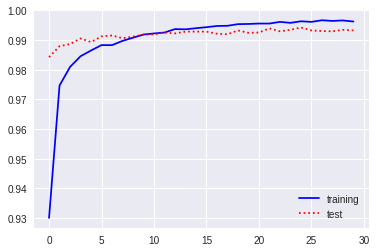

In [0]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

## 가중치 정보

> 트레이닝이 끝난 모형의 가중치 정보는 get_weights 메서드로 구할 수 있다. 이 메서드는 w 값과 b 값을 출력한다.

In [0]:
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((3, 3, 1, 32), (32,))

In [0]:
w2 = l2.get_weights()
w2[0].shape, w2[1].shape

((3, 3, 32, 64), (64,))

## 모형의 사용

> 트레이닝이 끝난 모형은 predict 메서드로 y 값을 출력하거나 출력된 y값을 각 클래스에 대한 판별함수로 가정하고 predict_classes 메서드로 classification을 할 수 있다.

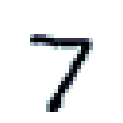

In [0]:
plt.figure(figsize=(2, 2))
plt.imshow(X_test0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
model.predict(X_test[:1, :])

array([[9.9472325e-23, 3.7620571e-16, 1.1398797e-18, 4.9467961e-14,
        1.9448685e-17, 9.8012186e-19, 1.1583462e-27, 1.0000000e+00,
        5.6439054e-21, 3.8568253e-14]], dtype=float32)

In [0]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7])

## DL 모형의 저장

>  트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장하였다가 나중에 load 명령으로 불러 사용할 수 있다.

In [0]:
model.save('my_model_dl.hdf5')
# del model

In [0]:
ls

model_DL.png  my_model_dl.hdf5  sample_data/


In [0]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
from keras.models import load_model

model2 = load_model('my_model_dl.hdf5')
model2.predict_classes(X_test[:1, :], verbose=0)

array([7])

In [0]:
model2.predict_classes(X_test[:10, :], verbose=0)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [0]:
y_test0[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

### 테스트 데이터에 대한 예측 정확도 계산 

In [0]:
# Correct prediction
model2.predict_classes(X_test[8:9, :], verbose=1)

1/1 [==============================] - 0s 3ms/step


array([5])

In [0]:
y_test0[8]

5

In [0]:
# 전체 테스트 데이터에 대한 예측
x_pred = model2.predict_classes(X_test, verbose=1)

10000/10000 [==============================] - 1s 99us/step


In [0]:
t_count = np.sum(x_pred==y_test0) # True positive
f_count = np.sum(x_pred!=y_test0) # False positive
f_count==10000-t_count

True

In [0]:
t_count,f_count

(9932, 68)

In [0]:
accuracy = t_count/10000*100
accuracy

99.32

## DL is great!!!

### Goood introduction to CNN
- [Image(Cat vs. dog) classifier with CNN](https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8)

- [Full CNN overview](https://cdn-images-1.medium.com/max/1100/1*qsbsCVyu376kqdnNcdxmmw.png)
- [Process of CNN](https://cdn-images-1.medium.com/max/1100/1*yZQjaMKHjm1HzDF4t4juzg.png)